# MNIST Classification Task

In this notebook, I'm going to take a look at MNIST dataset and create a model, which will be able to make number predictions from 0 to 9. 

Dataset is from Kaggle: https://www.kaggle.com/c/digit-recognizer/data

Made by Krystian Rozwag

## 1. Loading necessary tools

I'm loading necessary tools to load data from CSV, split, train, evaluate and save predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

Loading train csv with 42000 rows and 785 columns (1 column is a label column, rest are pixels - each picture has shape (28,28) which makes 784). 

In [2]:
train = pd.read_csv('train.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I split data to label (y) and picture matrix (X). Next, split to train and test.

In [3]:
y = train['label']
X = train.drop('label',axis=1)
X = np.array(X)
y = to_categorical(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=52)

In this cell, I'm creating Sequential model using 7 layers (1 input, 1 output and 5 hidden layers). Next, I'm compiling model using 'adam' optimizer and 'binary_crossentropy' as a loss function. At the end, I created callback. ModelCheckpoint to choose the best epoch (when model had the best accuracy) and save weights to file.

In [4]:
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

checkpoint_filepath = './tmp/checkpoint'

ck = ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

I'm going to fit model with 30 epochs, and validation split set to 30%.

In [5]:
model_1 = model.fit(X_train,y_train,epochs=30, validation_split=0.3, callbacks=[ck])

Epoch 1/30
644/644 [==============================] - 1s 2ms/step - loss: 0.2742 - accuracy: 0.6715 - val_loss: 0.0742 - val_accuracy: 0.8738
Epoch 2/30
644/644 [==============================] - 1s 1ms/step - loss: 0.0637 - accuracy: 0.8930 - val_loss: 0.0490 - val_accuracy: 0.9218
Epoch 3/30
644/644 [==============================] - 1s 2ms/step - loss: 0.0476 - accuracy: 0.9225 - val_loss: 0.0412 - val_accuracy: 0.9336
Epoch 4/30
644/644 [==============================] - 1s 1ms/step - loss: 0.0390 - accuracy: 0.9377 - val_loss: 0.0403 - val_accuracy: 0.9329
Epoch 5/30
644/644 [==============================] - 1s 1ms/step - loss: 0.0346 - accuracy: 0.9441 - val_loss: 0.0422 - val_accuracy: 0.9391
Epoch 6/30
644/644 [==============================] - 1s 1ms/step - loss: 0.0320 - accuracy: 0.9507 - val_loss: 0.0378 - val_accuracy: 0.9410
Epoch 7/30
644/644 [==============================] - 1s 1ms/step - loss: 0.0285 - accuracy: 0.9547 - val_loss: 0.0365 - val_accuracy: 0.9519
Epoch 

I am also checking model summary. I've got almost 200k parameters. Most of them in input layer.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

Looking at the graph of val_loss, we can see that the lowest point was in 10th epoch.

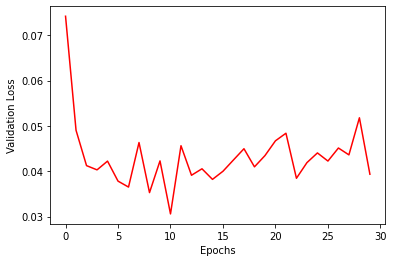

In [7]:
plt.plot(model_1.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

I'm loading the best weights saved in file.

In [8]:
model.load_weights(checkpoint_filepath)

And evaluating a model. I've got very small loss and 96% accuracy using test data.

In [9]:
model.evaluate(X_test,y_test)

394/394 [==============================] - 0s 613us/step - loss: 0.0436 - accuracy: 0.9634


[0.043644554913043976, 0.9634127020835876]

I'm loading test.csv data to make predictions and later save them to csv file and make submission on kaggle site.

In [10]:
test = pd.read_csv('test.csv')

In [11]:
sub = pd.read_csv('sample_submission.csv',index_col='ImageId')
sub['Label'] = np.argmax(model.predict(test), axis=-1)
sub.to_csv('submission.csv')